#### MultiIndex Dataset: For Tracked vs outage Visualization

In [ ]:
import pandas as pd
import xarray as xr

# Define the path to your file
file_path = './../Data Given for Challenge/data/train.nc'
# Open the NetCDF file as an xarray Dataset
try:
    ds = xr.open_dataset(file_path)

    # --- Exploration ---

    # 1. Print the dataset summary
    # This is the best first step! It shows dimensions, coordinates,
    # data variables, and global attributes.
    print("--- Dataset Summary ---")
    print(ds)
    print("\n" + "="*50 + "\n")

    # 2. List the names of all data variables
    print("--- Data Variables ---")
    variable_names = list(ds.data_vars)
    print(variable_names)
    print("\n" + "="*50 + "\n")

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

--- Dataset Summary ---
<xarray.Dataset> Size: 159MB
Dimensions:    (location: 83, timestamp: 2161, feature: 109)
Coordinates:
  * location   (location) <U5 2kB '26001' '26003' '26005' ... '26163' '26165'
  * feature    (feature) object 872B 'SBT113' 'SBT114' 'SBT123' ... 'wz' 'wz_1'
  * timestamp  (timestamp) datetime64[ns] 17kB 2023-04-01 ... 2023-06-30
    state      (location) <U2 664B ...
Data variables:
    tracked    (location, timestamp) float64 1MB ...
    out        (location, timestamp) float64 1MB ...
    weather    (location, timestamp, feature) float64 156MB ...
Attributes:
    time_start:  2022-01-01T00:00:00
    time_end:    2022-01-31T23:00:00
    time_now:    2025-07-08T14:59:10


--- Data Variables ---
['tracked', 'out', 'weather']




In [12]:
# Convert the xarray Dataset to a pandas DataFrame
# This will create a multi-index DataFrame from the dataset's coordinates
dff = ds.to_dataframe()

# Print the dataset summary again for comparison
print("--- Original xarray Dataset ---")
print(ds)
print("\n" + "="*50 + "\n")

--- Original xarray Dataset ---
<xarray.Dataset> Size: 159MB
Dimensions:    (location: 83, timestamp: 2161, feature: 109)
Coordinates:
  * location   (location) <U5 2kB '26001' '26003' '26005' ... '26163' '26165'
  * feature    (feature) object 872B 'SBT113' 'SBT114' 'SBT123' ... 'wz' 'wz_1'
  * timestamp  (timestamp) datetime64[ns] 17kB 2023-04-01 ... 2023-06-30
    state      (location) <U2 664B '26' '26' '26' '26' ... '26' '26' '26' '26'
Data variables:
    tracked    (location, timestamp) float64 1MB 1.259e+04 ... 2.046e+04
    out        (location, timestamp) float64 1MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    weather    (location, timestamp, feature) float64 156MB 221.5 ... 0.0244
Attributes:
    time_start:  2022-01-01T00:00:00
    time_end:    2022-01-31T23:00:00
    time_now:    2025-07-08T14:59:10




In [21]:
# Display the resulting DataFrame
print("--- Converted Pandas DataFrame ---")
dff.tail(300)

--- Converted Pandas DataFrame ---


tracked  out      weather state
location timestamp           feature                                 
26165    2023-06-29 22:00:00 gh_5     20465.0  0.0  1197.086426    26
                             gh_6     20465.0  0.0  4140.000000    26
                             gh_7     20465.0  0.0  4137.336914    26
                             gust     20465.0  0.0     7.415239    26
                             hail     20465.0  0.0     0.000000    26
...                                       ...  ...          ...   ...
         2023-06-30 00:00:00 vstm     20465.0  0.0    -4.118605    26
                             vucsh    20465.0  0.0     0.695652    26
                             vvcsh    20465.0  0.0     3.777128    26
                             wz       20465.0  0.0    -0.013144    26
                             wz_1     20465.0  0.0     0.024395    26

[300 rows x 4 columns]

In [30]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19550567 entries, ('26001', Timestamp('2023-04-01 00:00:00'), 'SBT113') to ('26165', Timestamp('2023-06-30 00:00:00'), 'wz_1')
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   tracked  float64
 1   out      float64
 2   weather  float64
 3   state    object 
dtypes: float64(3), object(1)
memory usage: 671.3+ MB


In [26]:
# Filter for location '26001' using MultiIndex
dff.loc['26001']

tracked   out     weather state
timestamp  feature                                 
2023-04-01 SBT113   12588.0   0.0  221.470001    26
           SBT114   12588.0   0.0  252.800003    26
           SBT123   12588.0   0.0  229.880005    26
           SBT124   12588.0   0.0  263.500000    26
           aod      12588.0   0.0    0.000000    26
...                     ...   ...         ...   ...
2023-06-30 vstm     12645.0  10.0   -1.368605    26
           vucsh    12645.0  10.0   -0.179348    26
           vvcsh    12645.0  10.0    7.714628    26
           wz       12645.0  10.0   -0.013144    26
           wz_1     12645.0  10.0    0.024395    26

[235549 rows x 4 columns]

In [44]:
dff['tracked']  # as this is a column we can directly access it

location  timestamp   feature
26001     2023-04-01  SBT113     12588.0
                      SBT114     12588.0
                      SBT123     12588.0
                      SBT124     12588.0
                      aod        12588.0
                                  ...   
26165     2023-06-30  vstm       20465.0
                      vucsh      20465.0
                      vvcsh      20465.0
                      wz         20465.0
                      wz_1       20465.0
Name: tracked, Length: 19550567, dtype: float64

#### 1) For 109 Features 

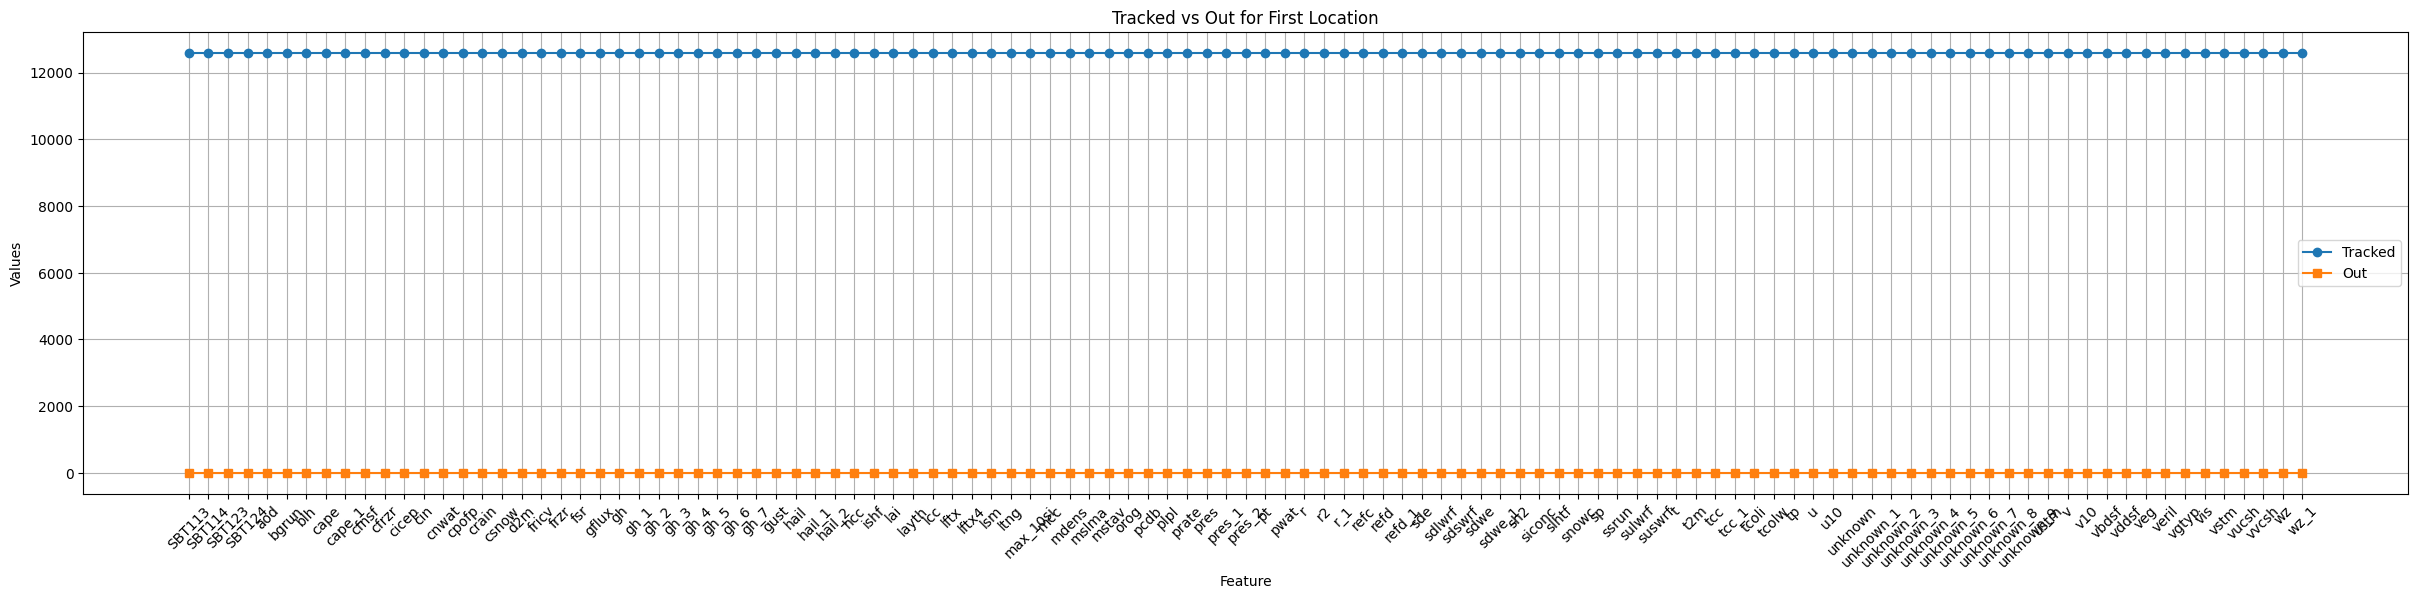

In [48]:
import matplotlib.pyplot as plt

# Select the first location and timestamp block
first_loc = dff.index.get_level_values('location')[0]
first_time = dff.index.get_level_values('timestamp')[0]
df_loc = dff.loc[(first_loc, first_time)]

# Plot tracked and out for all features
plt.figure(figsize=(30,6))
plt.plot(df_loc.index, df_loc['tracked'], marker='o', label='Tracked')
plt.plot(df_loc.index, df_loc['out'], marker='s', label='Out')

plt.title("Tracked vs Out for First Location")
plt.xlabel("Feature")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


#### 2) All Available Timestamps for 1st Location 

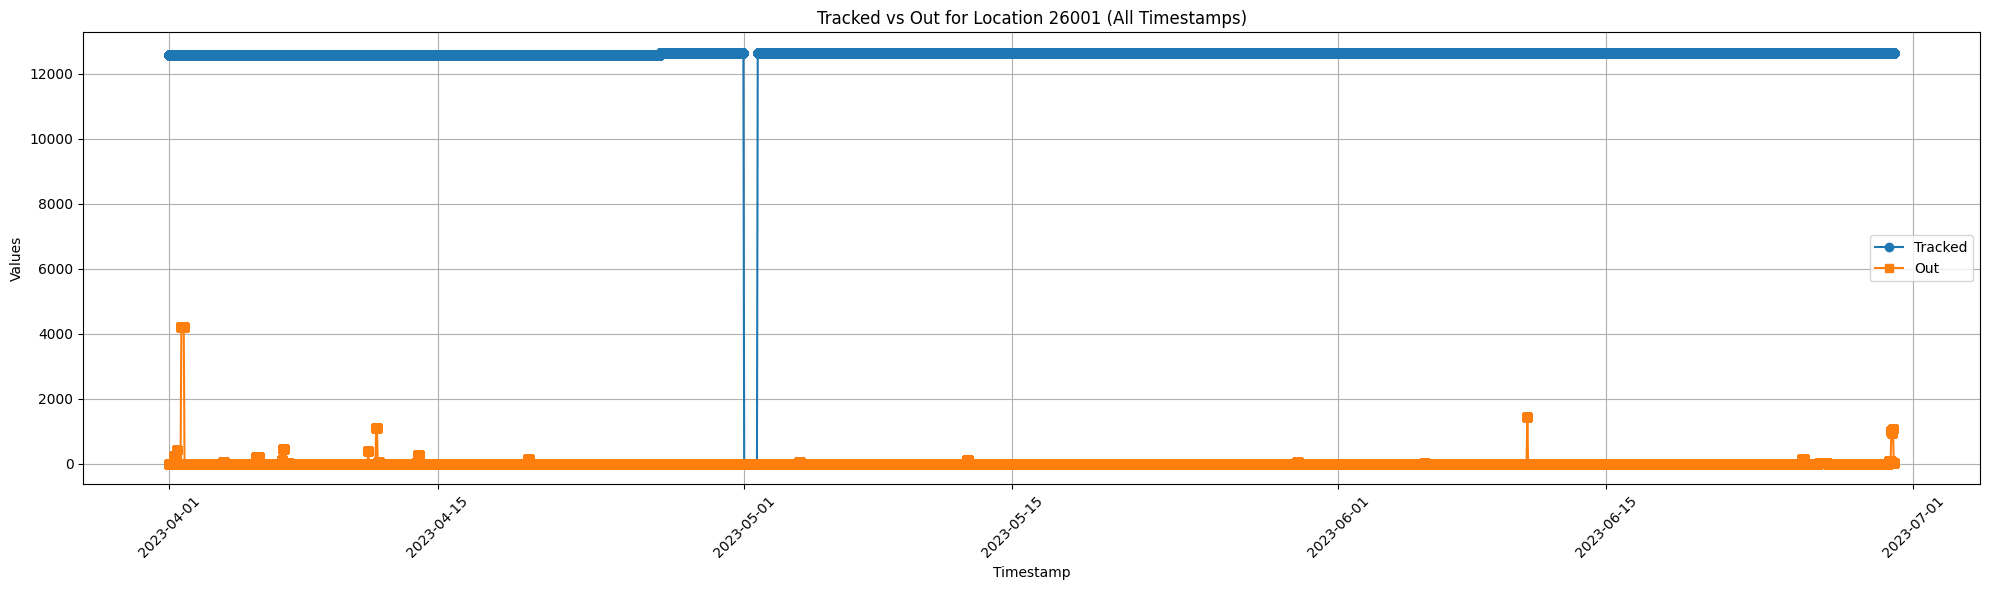

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the first available location
location_ids = dff.index.get_level_values('location').unique()
location_id = location_ids[0]  # Change as needed

# Filter for all timestamps for the selected location
df_loc = dff.xs(location_id, level='location')

# Ensure the timestamp index is in datetime format and sort by timestamp
if not pd.api.types.is_datetime64_any_dtype(df_loc.index.get_level_values('timestamp')):
    df_loc = df_loc.assign(timestamp_dt=pd.to_datetime(df_loc.index.get_level_values('timestamp')))
else:
    df_loc = df_loc.assign(timestamp_dt=df_loc.index.get_level_values('timestamp'))

# Sort by timestamp in ascending order
df_loc = df_loc.sort_values('timestamp_dt')

# Plot tracked and out over all timestamps
plt.figure(figsize=(20,6))
plt.plot(df_loc['timestamp_dt'], df_loc['tracked'], marker='o', label='Tracked')
plt.plot(df_loc['timestamp_dt'], df_loc['out'], marker='s', label='Out')
plt.title(f"Tracked vs Out for Location {location_id} (All Timestamps)")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3) Daily Trend (Median)

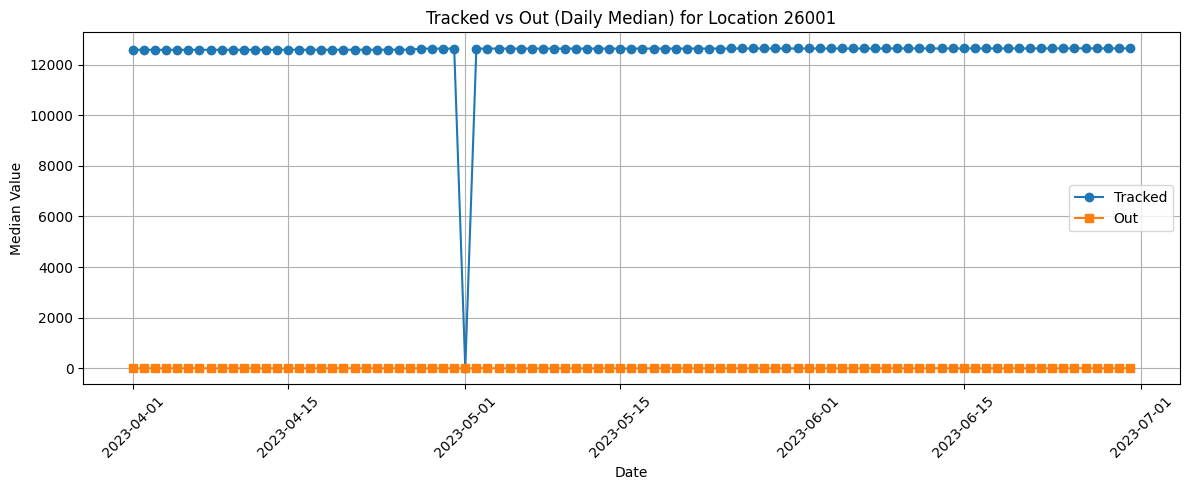

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- pick one location ---
location_ids = dff.index.get_level_values('location').unique()
location_id = location_ids[0]   # change to whichever location you want

# select rows for that location using iloc
pos = np.where(dff.index.get_level_values('location') == location_id)[0]
df_loc = dff.iloc[pos].reset_index()

# convert timestamp to datetime
df_loc['timestamp_dt'] = pd.to_datetime(df_loc['timestamp'])

# group by DATE (not hour), take median of tracked & out
df_daily = (
    df_loc.groupby(df_loc['timestamp_dt'].dt.date)[['tracked', 'out']]
    .median()
)

# --- plot ---
plt.figure(figsize=(12,5))
plt.plot(df_daily.index, df_daily['tracked'], marker='o', label='Tracked')
plt.plot(df_daily.index, df_daily['out'], marker='s', label='Out')

plt.title(f"Tracked vs Out (Daily Median) for Location {location_id}")
plt.xlabel("Date")
plt.ylabel("Median Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 4) Hourly Trends Within a Day

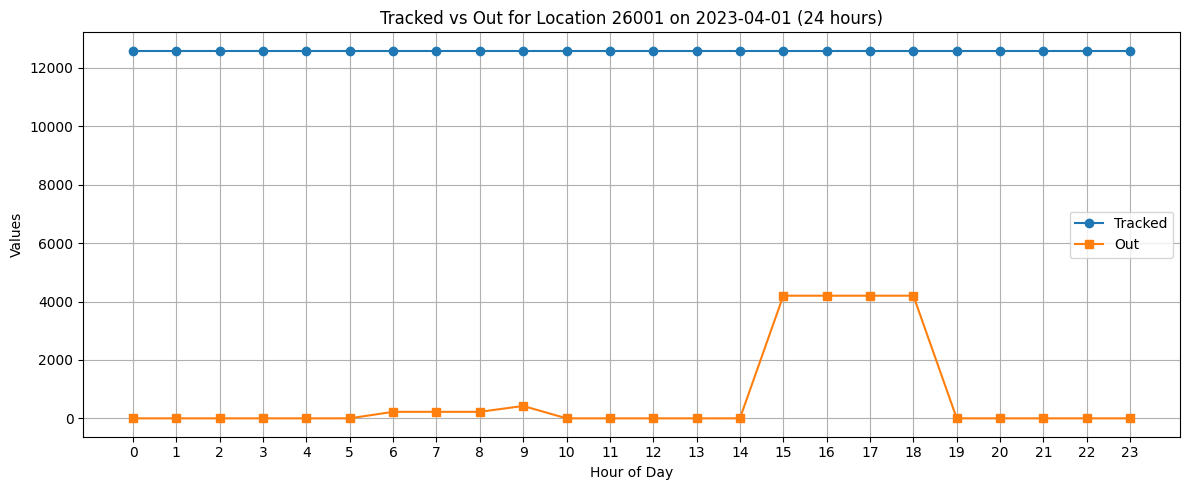

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- pick one location ---
location_ids = dff.index.get_level_values('location').unique()
location_id = location_ids[0]   # change as needed

# extract rows for that location using iloc
pos = np.where(dff.index.get_level_values('location') == location_id)[0]
df_loc = dff.iloc[pos].reset_index()

# convert timestamp
df_loc['timestamp_dt'] = pd.to_datetime(df_loc['timestamp'])

# --- helper function for hourly aggregation ---
def hourly_data(df, date):
    df_day = df[df['timestamp_dt'].dt.date == date]
    return (
        df_day.groupby(df_day['timestamp_dt'].dt.hour)[['tracked','out']]
        .mean()
        .reindex(range(24))
    )

# first available date
first_day = df_loc['timestamp_dt'].dt.date.min()
df_hour_first = hourly_data(df_loc, first_day)

# --- plot 1: first available day ---
plt.figure(figsize=(12,5))
plt.plot(df_hour_first.index, df_hour_first['tracked'], marker='o', label='Tracked')
plt.plot(df_hour_first.index, df_hour_first['out'], marker='s', label='Out')
plt.title(f"Tracked vs Out for Location {location_id} on {first_day} (24 hours)")
plt.xlabel("Hour of Day")
plt.ylabel("Values")
plt.xticks(range(0,24,1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

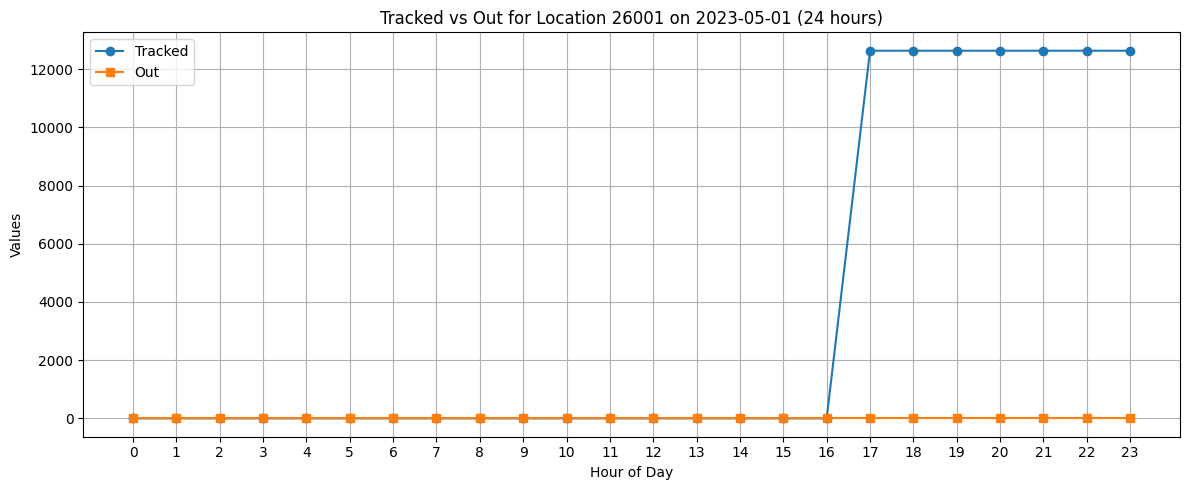

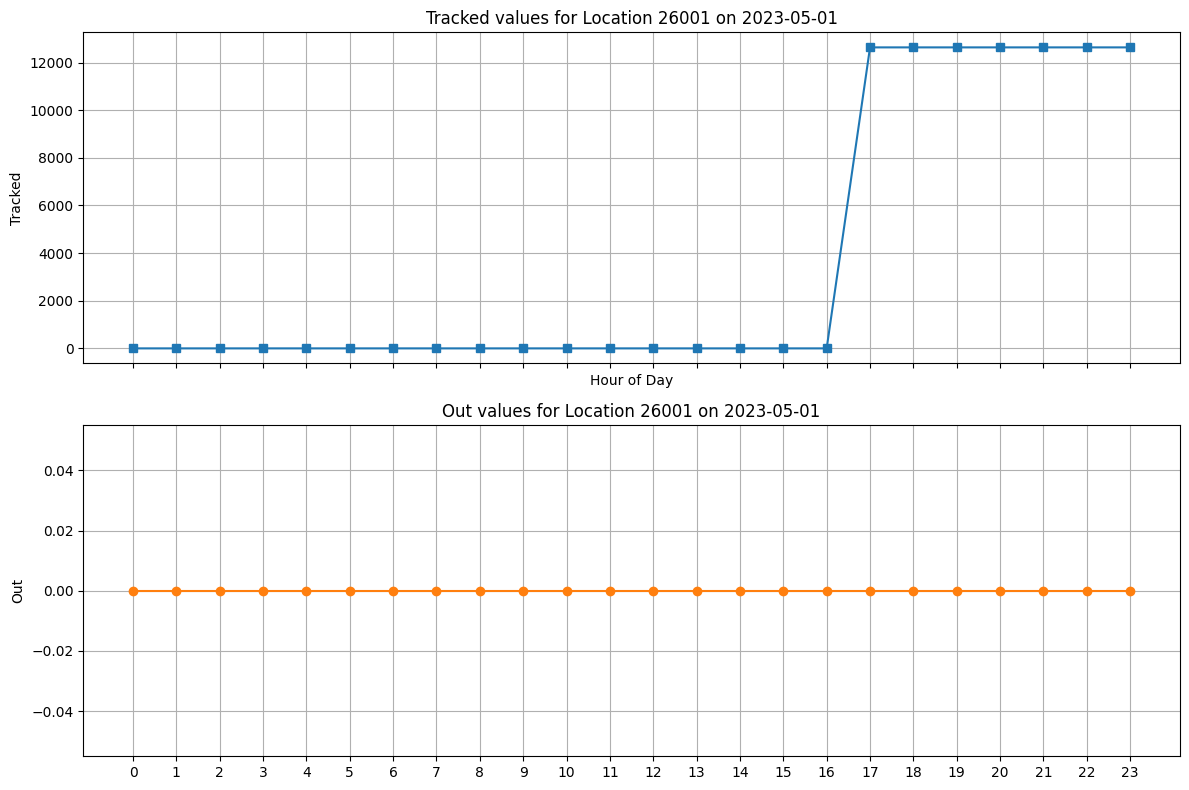

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- plot 2: specific target date ---
# specific date (2023-05-01) if available
target_date = pd.to_datetime("2023-05-01").date()
if target_date in df_loc['timestamp_dt'].dt.date.unique():
    df_hour_target = hourly_data(df_loc, target_date)
else:
    df_hour_target = None
    print(f"No data found for {target_date}")

if df_hour_target is not None:
    plt.figure(figsize=(12,5))
    plt.plot(df_hour_target.index, df_hour_target['tracked'], marker='o', label='Tracked')
    plt.plot(df_hour_target.index, df_hour_target['out'], marker='s', label='Out')
    plt.title(f"Tracked vs Out for Location {location_id} on {target_date} (24 hours)")
    plt.xlabel("Hour of Day")
    plt.ylabel("Values")
    plt.xticks(range(0,24,1))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- pick one location ---
location_ids = dff.index.get_level_values('location').unique()
location_id = location_ids[0]   # change as needed

# extract rows for that location using iloc
pos = np.where(dff.index.get_level_values('location') == location_id)[0]
df_loc = dff.iloc[pos].reset_index()

# convert timestamp
df_loc['timestamp_dt'] = pd.to_datetime(df_loc['timestamp'])

# --- prepare data for a specific date ---
target_date = pd.to_datetime("2023-05-01").date()

if target_date in df_loc['timestamp_dt'].dt.date.unique():
    df_day = df_loc[df_loc['timestamp_dt'].dt.date == target_date]
    
    # group by HOUR of the day, aggregate across features
    df_hour = (
        df_day.groupby(df_day['timestamp_dt'].dt.hour)[['tracked', 'out']]
        .mean()
        .reindex(range(24))
    )
    
    # --- create subplots ---
    fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

    # subplot 1: Tracked
    axes[0].plot(df_hour.index, df_hour['tracked'], marker='s', color='tab:blue')
    axes[0].set_title(f"Tracked values for Location {location_id} on {target_date}")
    axes[0].set_xlabel("Hour of Day")
    axes[0].set_ylabel("Tracked")
    axes[0].set_xticks(range(0,24,1))
    axes[0].grid(True)

    # subplot 2: Out
    axes[1].plot(df_hour.index, df_hour['out'], marker='o', color='tab:orange')
    axes[1].set_title(f"Out values for Location {location_id} on {target_date}")
    axes[1].set_ylabel("Out")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
else:
    print(f"No data available for {target_date} at Location {location_id}")


The Dip in Tracked feature on 2023-05-01 where even Outage is 0 could be due least to none data present for that.